In [88]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [230]:
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = 'UMBXRDZBWVKGUASW4MJFSEFTXFFWKTEJ0IUVW4KQVM4NNDCU' # your Foursquare ID
CLIENT_SECRET = 'O3Q1T3STVA4TSK33BTIFH3CTAWSUY2JVE4DEQ3T1RJAEWURM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UMBXRDZBWVKGUASW4MJFSEFTXFFWKTEJ0IUVW4KQVM4NNDCU
CLIENT_SECRET:O3Q1T3STVA4TSK33BTIFH3CTAWSUY2JVE4DEQ3T1RJAEWURM


**Get Category function**

In [89]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Capitals of the world and their coordinates**

In [104]:
url = 'http://techslides.com/list-of-countries-and-capitals'
html = requests.get(url).content
df_list = pd.read_html(html)
dam = df_list[0]
da=dam.reset_index()
df=da.drop(['index'], axis=1)
df.head(50)

,0,1,2,3,4,5
0,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
1,Afghanistan,Kabul,34.51666667,69.183333,AF,Asia
2,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe
3,Albania,Tirana,41.31666667,19.816667,AL,Europe
4,Algeria,Algiers,36.75,3.05,DZ,Africa
5,American Samoa,Pago Pago,-14.26666667,-170.7,AS,Australia
6,Andorra,Andorra la Vella,42.5,1.516667,AD,Europe
7,Angola,Luanda,-8.833333333,13.216667,AO,Africa
8,Anguilla,The Valley,18.21666667,-63.05,AI,North America
9,Antarctica,NaN,0,0,AQ,Antarctica


In [105]:
df.columns = df.iloc[0]
df=df.drop(df.index[0])
df=df.reset_index()
df.head()

,index,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,1,Afghanistan,Kabul,34.51666667,69.183333,AF,Asia
1,2,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe
2,3,Albania,Tirana,41.31666667,19.816667,AL,Europe
3,4,Algeria,Algiers,36.75,3.05,DZ,Africa
4,5,American Samoa,Pago Pago,-14.26666667,-170.7,AS,Australia


**Filtering only Europe capitals**

In [108]:
df=df.loc[df['Continent Name']=='Europe']
df.head()

,index,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
1,2,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe
2,3,Albania,Tirana,41.31666667,19.816667,AL,Europe
5,6,Andorra,Andorra la Vella,42.5,1.516667,AD,Europe
11,12,Armenia,Yerevan,40.16666667,44.5,AM,Europe
14,15,Austria,Vienna,48.2,16.366667,AT,Europe


In [109]:
df=df.drop(['index', 'Country Name', 'Country Code','Continent Name'], axis=1)

In [110]:
coordenadas=df.values.tolist()
print(coordenadas)

[['Mariehamn', '60.116667', '19.9'], ['Tirana', '41.31666667', '19.816667'], ['Andorra la Vella', '42.5', '1.516667'], ['Yerevan', '40.16666667', '44.5'], ['Vienna', '48.2', '16.366667'], ['Baku', '40.38333333', '49.866667'], ['Minsk', '53.9', '27.566667'], ['Brussels', '50.83333333', '4.333333'], ['Sarajevo', '43.86666667', '18.416667'], ['Sofia', '42.68333333', '23.316667'], ['Zagreb', '45.8', '16'], ['Nicosia', '35.16666667', '33.366667'], ['Prague', '50.08333333', '14.466667'], ['Copenhagen', '55.66666667', '12.583333'], ['Tallinn', '59.43333333', '24.716667'], ['Torshavn', '62', '-6.766667'], ['Helsinki', '60.16666667', '24.933333'], ['Paris', '48.86666667', '2.333333'], ['Tbilisi', '41.68333333', '44.833333'], ['Berlin', '52.51666667', '13.4'], ['Gibraltar', '36.13333333', '-5.35'], ['Athens', '37.98333333', '23.733333'], ['Saint Peter Port', '49.45', '-2.533333'], ['Budapest', '47.5', '19.083333'], ['Reykjavik', '64.15', '-21.95'], ['Dublin', '53.31666667', '-6.233333'], ['Dougl

In [190]:
coordenadas_data=pd.DataFrame(coordenadas)
coordenadas_data.columns=['City','Latitude','Longitude']
coordenadas_data.head()

,City,Latitude,Longitude
0,Mariehamn,60.116667,19.9
1,Tirana,41.31666667,19.816667
2,Andorra la Vella,42.5,1.516667
3,Yerevan,40.16666667,44.5
4,Vienna,48.2,16.366667


In [111]:
nearby_venues_countries=[]

In [112]:
limit=500
radius= 1000

**Creating a function to obtain the venues of every european capiytal**

In [113]:
for i in range(len(coordenadas)):
    neighborhood_latitude=float(coordenadas[i][1])
    neighborhood_longitude=float(coordenadas[i][2])
    name=coordenadas[i][0]
    url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, limit)
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    nearby_venues['City']= name
    nearby_venues_countries.append(nearby_venues)

print(len(nearby_venues_countries))
    

58


In [166]:
nearby_venues_countries[3].head()

,name,categories,lat,lng,City
0,SAS Food Court,Food Court,40.166252,44.505572,Yerevan
1,Komitas Museum-Institute | Կոմիտասի թանգարան-ի...,Museum,40.161983,44.502250,Yerevan
2,CRUMBS Bread Factory,Bakery,40.171155,44.503958,Yerevan
3,DoubleTree by Hilton,Hotel,40.171934,44.508330,Yerevan
4,BetConstruct Armenia,Tech Startup,40.170015,44.509829,Yerevan


**consolidating the information of every capital in a single data frame**

In [167]:
nearby_venues_countries_df=pd.concat(nearby_venues_countries,ignore_index=True)
print(df.shape[0])

4332


In [127]:
#df=df.groupby(['City','categories']).count().reset_index()

In [168]:
nearby_venues_countries_df.head()

,name,categories,lat,lng,City
0,S-market,Supermarket,60.113546,19.914325,Mariehamn
1,Taurus,Burrito Place,60.112186,19.893957,Mariehamn
2,Feja,Paper / Office Supplies Store,60.112267,19.912491,Mariehamn
3,Crossfit North AX,Gym,60.111083,19.911427,Mariehamn
4,Torpfjärdens Fågeltorn,Lake,60.108437,19.899360,Mariehamn


In [169]:
nearby_venues_countries_df=nearby_venues_countries_df.loc[:,['City','categories','name']]
nearby_venues_countries_df.head()

,City,categories,name
0,Mariehamn,Supermarket,S-market
1,Mariehamn,Burrito Place,Taurus
2,Mariehamn,Paper / Office Supplies Store,Feja
3,Mariehamn,Gym,Crossfit North AX
4,Mariehamn,Lake,Torpfjärdens Fågeltorn


In [170]:
nearby_venues_countries_df.head(100)

,City,categories,name
0,Mariehamn,Supermarket,S-market
1,Mariehamn,Burrito Place,Taurus
2,Mariehamn,Paper / Office Supplies Store,Feja
3,Mariehamn,Gym,Crossfit North AX
4,Mariehamn,Lake,Torpfjärdens Fågeltorn
5,Mariehamn,Cosmetics Shop,Smilodent Tandblekning
6,Tirana,Diner,The Carlsberg
7,Tirana,Hotel,Xheko Imperial Hotel
8,Tirana,Italian Restaurant,Artigiano
9,Tirana,Ice Cream Shop,Yogurteria


**Quantity of venues per capital**

In [223]:
explore_data=nearby_venues_countries_df.groupby('City').count()
explore_data.drop('categories',axis=1,inplace=True)
explore_data.head(50)

,name
City,
Amsterdam,100
Andorra la Vella,43
Ankara,100
Athens,100
Baku,100
Belgrade,8
Berlin,100
Bern,10
Bratislava,100


**Cities according to their quantity of venues**

In [224]:
explore_data.reset_index(inplace=True)
explore_data.columns=['City','Quantity']
print(explore_data)

                City  Quantity
0          Amsterdam       100
1   Andorra la Vella        43
2             Ankara       100
3             Athens       100
4               Baku       100
5           Belgrade         8
6             Berlin       100
7               Bern        10
8         Bratislava       100
9           Brussels       100
10         Bucharest       100
11          Budapest       100
12          Chisinau        43
13        Copenhagen       100
14           Douglas        56
15            Dublin        31
16         Gibraltar        42
17          Helsinki       100
18              Kyiv       100
19            Lisbon       100
20         Ljubljana       100
21            London       100
22      Longyearbyen        35
23        Luxembourg        53
24            Madrid       100
25         Mariehamn         6
26             Minsk       100
27            Monaco        91
28            Moscow       100
29           Nicosia       100
30     North Nicosia       100
31      

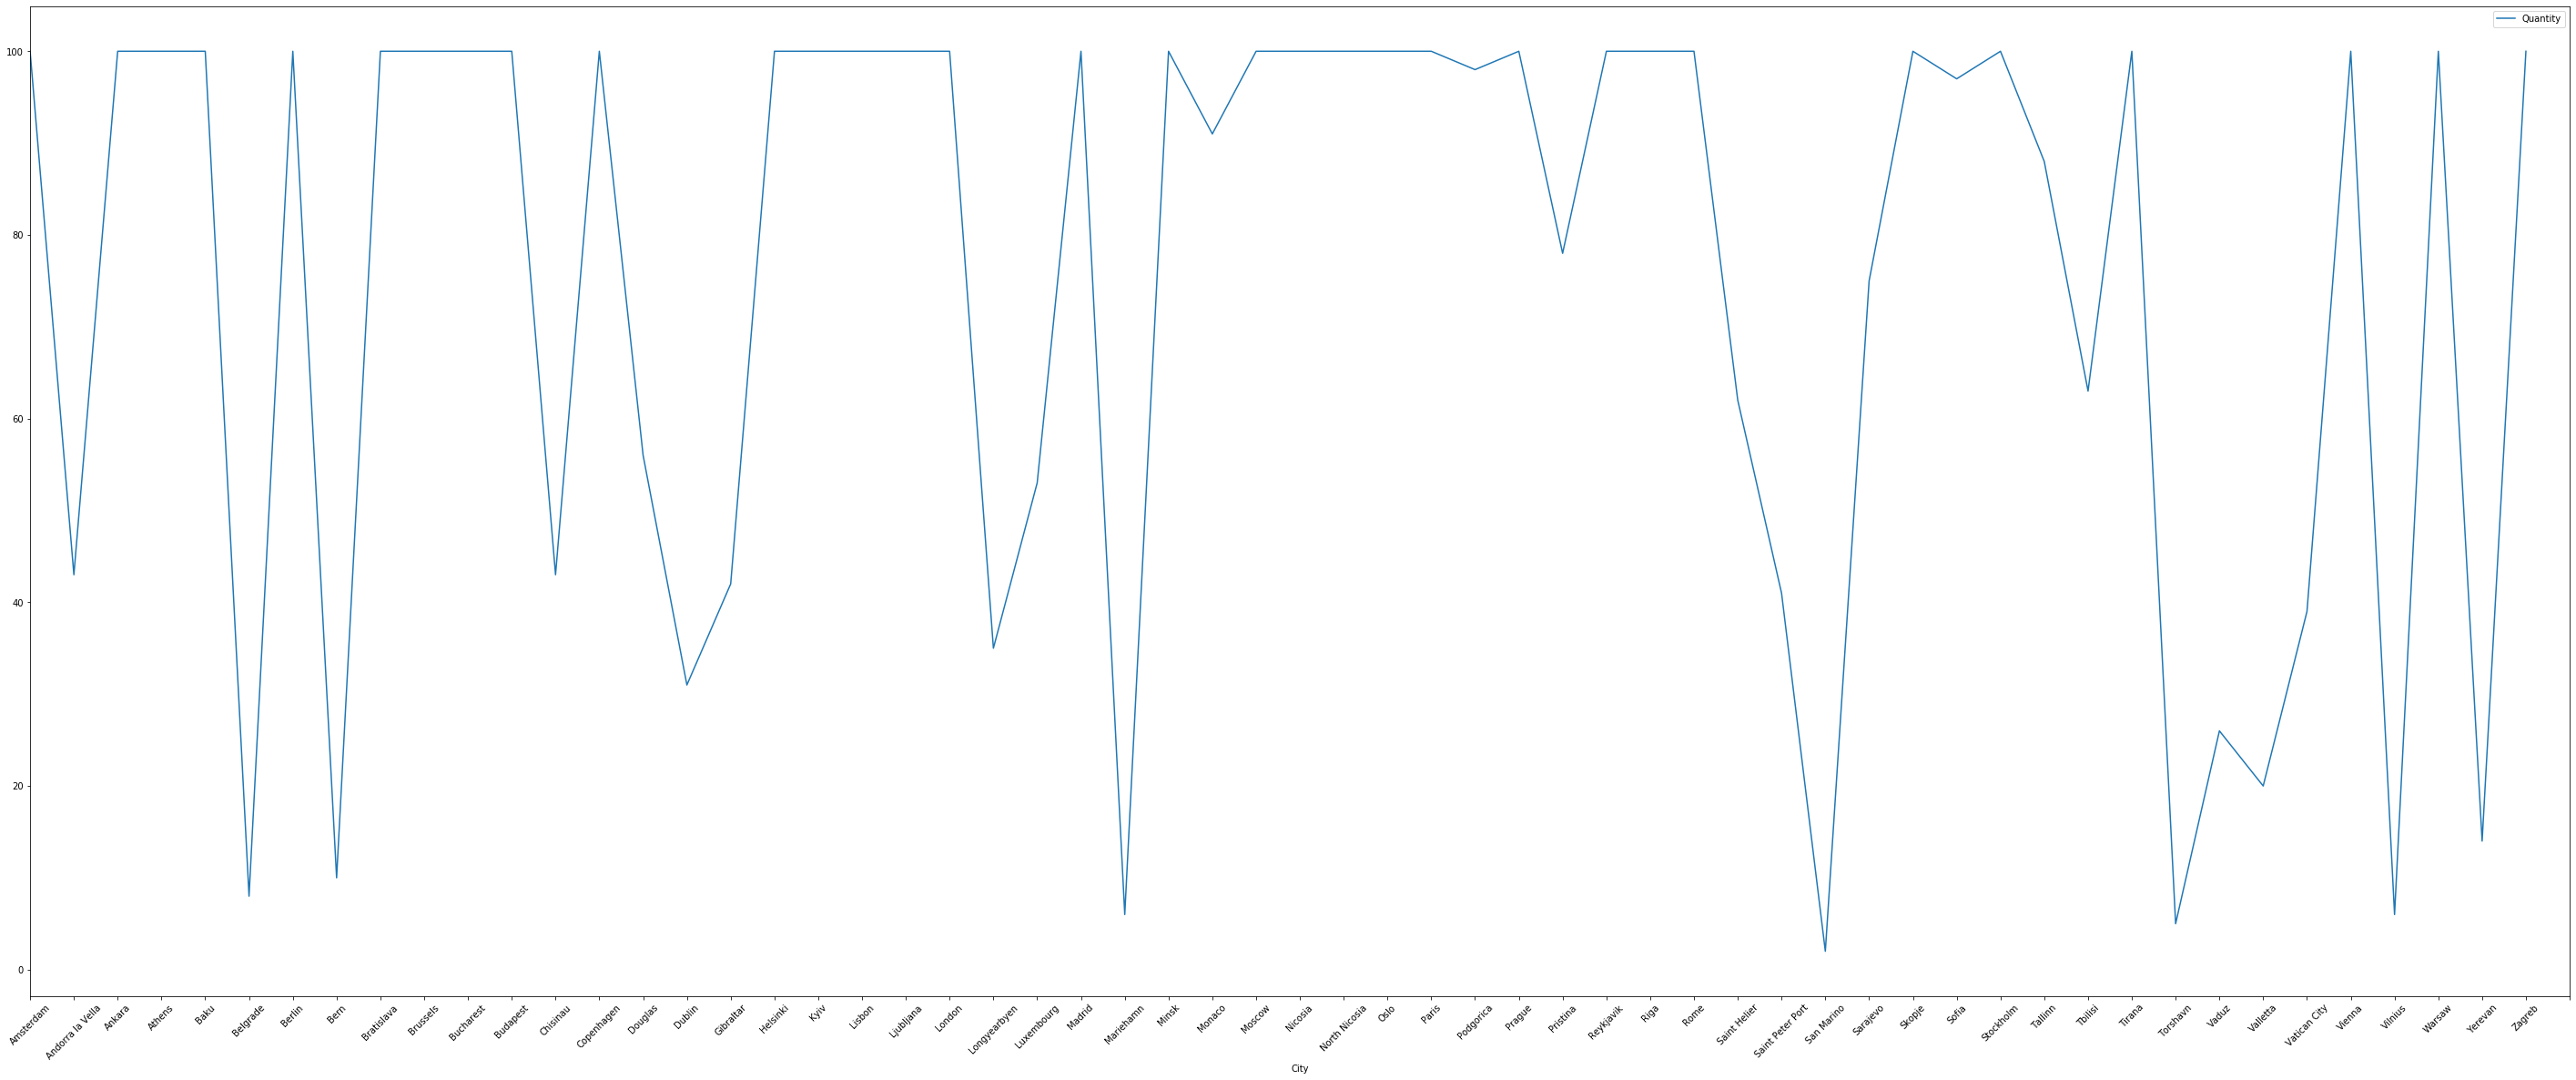

In [237]:
explore_data.plot(x ='City', y='Quantity', kind = 'line',figsize =(50,20))
x_max=explore_data.shape[0]
tick_labels = tuple(explore_data['City'])
plt.xticks(range(0, x_max+1), tick_labels, rotation=45)
plt.show()

**Getting dummies of the categories of the venues**

In [171]:
Categorias=pd.get_dummies(nearby_venues_countries_df['categories'])
Categorias.head()

,Adult Boutique,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belarusian Restaurant,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Blini House,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal Lock,Candy Store,Casino,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Magirio,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Ouzeri,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant

**En función del tiempo se prescindirá de la cantidad de lugares**

In [172]:
Ciudades=nearby_venues_countries_df['City']
Ciudades=pd.DataFrame(Ciudades)
Ciudades.head()


,City
0,Mariehamn
1,Mariehamn
2,Mariehamn
3,Mariehamn
4,Mariehamn


In [173]:
df_dummies=pd.concat([Ciudades,Categorias], axis=1)
df_dummies.head()

,City,Adult Boutique,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belarusian Restaurant,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Blini House,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal Lock,Candy Store,Casino,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Magirio,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Ouzeri,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Resta

In [174]:
df_dummies_group= df_dummies.groupby('City').mean().reset_index()
df_dummies_group.head()

,City,Adult Boutique,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belarusian Restaurant,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Blini House,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal Lock,Candy Store,Casino,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Magirio,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Ouzeri,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Resta

In [175]:
print(df_dummies_group.shape[0])

58


**K-mean, 8 differents clusters**

In [196]:
# set number of clusters
kclusters = 8

grouped_clustering = df_dummies_group.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 6, 2, 7, 0, 0, 2, 0], dtype=int32)

**Creating a new data including the cluster per city**

In [197]:
print(len(kmeans.labels_))

58


In [198]:
kmeans.labels_=pd.DataFrame(kmeans.labels_)
kmeans.labels_.columns=['cluster']
kmeans.labels_.head()

,cluster
0,0
1,2
2,2
3,6
4,2


**Merging data with the latitude and longitude of each city**

In [244]:
data=pd.concat([df_dummies_group,kmeans.labels_],axis=1)
data.head()

,City,Adult Boutique,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belarusian Restaurant,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Blini House,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal Lock,Candy Store,Casino,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Magirio,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Ouzeri,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Resta

In [245]:
data_final=data.merge(coordenadas_data, on='City')
data_final.head()

,City,Adult Boutique,African Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belarusian Restaurant,Belgian Restaurant,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Blini House,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Brasserie,Bratwurst Joint,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal Lock,Candy Store,Casino,Castle,Caucasian Restaurant,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cretan Restaurant,Cricket Ground,Cuban Restaurant,Cultural Center,Cupcake Shop,Czech Restaurant,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Kumpir Restaurant,Lake,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Magirio,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Ouzeri,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Resta

**Generating a folium map with the clustered cities**

In [201]:
latitude=48.8032
longitude=2.3511

In [202]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_final['Latitude'], data_final['Longitude'], data_final['City'], data_final['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Cluster analisis**

In [250]:
cluster_0=data_final.loc[data_final['cluster']==0]
cluster_1=data_final.loc[data_final['cluster']==1]
cluster_2=data_final.loc[data_final['cluster']==2]
cluster_3=data_final.loc[data_final['cluster']==3]
cluster_4=data_final.loc[data_final['cluster']==4]
cluster_5=data_final.loc[data_final['cluster']==5]
cluster_6=data_final.loc[data_final['cluster']==6]
cluster_7=data_final.loc[data_final['cluster']==7]


**Citys per cluster**

In [325]:
cluster0_country=pd.DataFrame(data_final.loc[data_final['cluster']==0]['City'])
cluster1_country=pd.DataFrame(data_final.loc[data_final['cluster']==1]['City'])
cluster2_country=pd.DataFrame(data_final.loc[data_final['cluster']==2]['City'])
cluster3_country=pd.DataFrame(data_final.loc[data_final['cluster']==3]['City'])
cluster4_country=pd.DataFrame(data_final.loc[data_final['cluster']==4]['City'])
cluster5_country=pd.DataFrame(data_final.loc[data_final['cluster']==5]['City'])
cluster6_country=pd.DataFrame(data_final.loc[data_final['cluster']==6]['City'])
cluster7_country=pd.DataFrame(data_final.loc[data_final['cluster']==7]['City'])

,City
5,Belgrade


**Analizing most common venues per cluster**

In [291]:
cluster_0_=pd.DataFrame(cluster_0.mean())
cluster_0_.columns=['value']
cluster_0_= cluster_0_[cluster_0_['value'] != 0]
cluster_1_=pd.DataFrame(cluster_1.mean())
cluster_1_.columns=['value']
cluster_1_= cluster_1_[cluster_1_['value'] != 0]
cluster_2_=pd.DataFrame(cluster_2.mean())
cluster_2_.columns=['value']
cluster_2_= cluster_2_[cluster_2_['value'] != 0]
cluster_3_=pd.DataFrame(cluster_3.mean())
cluster_3_.columns=['value']
cluster_3_= cluster_3_[cluster_3_['value'] != 0]
cluster_4_=pd.DataFrame(cluster_4.mean())
cluster_4_.columns=['value']
cluster_4_= cluster_4_[cluster_4_['value'] != 0]
cluster_5_=pd.DataFrame(cluster_5.mean())
cluster_5_.columns=['value']
cluster_5_= cluster_5_[cluster_5_['value'] != 0]
cluster_6_=pd.DataFrame(cluster_6.mean())
cluster_6_.columns=['value']
cluster_6_= cluster_6_[cluster_6_['value'] != 0]
cluster_7_=pd.DataFrame(cluster_7.mean())
cluster_7_.columns=['value']
cluster_7_= cluster_7_[cluster_7_['value'] != 0]

In [316]:
cluster_0_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_0_.head(10)


,value
Hotel,0.059620
Italian Restaurant,0.043850
Café,0.036595
Bar,0.032923
Coffee Shop,0.032108
Restaurant,0.025819
Plaza,0.024194
Ice Cream Shop,0.017281
Sandwich Place,0.017075
Pizza Place,0.016660


In [317]:
cluster_1_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_1_.head(11)

,value
cluster,1.0
Construction & Landscaping,0.5
Health Food Store,0.5


In [318]:
cluster_2_.sort_values(by=['value'],inplace=True,ascending=False)

In [319]:
cluster_2_.head(11)

,value
cluster,2.000000
Café,0.103879
Restaurant,0.076326
Hotel,0.068919
Bar,0.040812
Coffee Shop,0.028821
Italian Restaurant,0.019567
Bakery,0.019234
Cocktail Bar,0.016128
Pub,0.015841


In [320]:
cluster_3_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_3_.head(11)

,value
cluster,3.000000
Burrito Place,0.166667
Cosmetics Shop,0.166667
Gym,0.166667
Lake,0.166667
Paper / Office Supplies Store,0.166667
Supermarket,0.166667


In [321]:
cluster_4_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_4_.head(11)

,value
cluster,4.0
Boat or Ferry,0.2
Bus Station,0.2
Furniture / Home Store,0.2
Harbor / Marina,0.2
Steakhouse,0.2


In [322]:
cluster_5_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_5_.head(11)

,value
cluster,5.000000
Grocery Store,0.333333
Art Gallery,0.166667
Beer Garden,0.166667
Motorcycle Shop,0.166667
Supermarket,0.166667


In [323]:
cluster_6_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_6_.head(11)

,value
cluster,6.000000
Coffee Shop,0.076195
Bar,0.051895
Hotel,0.048008
Pub,0.043079
Restaurant,0.042877
Café,0.039568
Cocktail Bar,0.025358
Park,0.022609
Plaza,0.021906


In [324]:
cluster_7_.sort_values(by=['value'],inplace=True,ascending=False)
cluster_7_.head(11)

,value
cluster,7.000
Flower Shop,0.250
Restaurant,0.250
Seafood Restaurant,0.250
Gas Station,0.125
Train Station,0.125
